In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from math import pi
import seaborn as sns

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

From Okounkova+21 [2101.11153]

$$
 \frac{1 + \cos \iota_\mathrm{gw}}{1 - \cos \iota_\mathrm{gw}} = \frac{e^{-d_C \kappa/2}(1 + \cos \iota_\mathrm{true})}{e^{d_C \kappa/2}(1 - \cos \iota_\mathrm{true})}
    $$
    
$$
c_g \equiv \cos \iota_\mathrm{gw}, \, c_t \equiv \cos \iota_\mathrm{true}
$$

$$
\kappa = \frac{1}{d_C} \left\| \log \left ( \frac{(1 + c_g)(1 - c_t)}{(1 - c_g)(1 + c_t)}   \right) \right\|
$$

In [2]:
def kappa_from_delta(cos_iota_gw, delta_cos_iota, d_c = 0.2):
    """ Compute kappa, the birefringence opacity parameter as a function of detected inclinations and distance
        iota_gw: inclination reported by GW detector
        delta_iota: difference between iota_gw and true inclination (or grb inclination)
        d_c: comoving distance to source, in GpC """
    cos_iota_tr = cos_iota_gw - delta_cos_iota
    return np.abs(np.log( \
                         ((1 + cos_iota_gw)*(1 - cos_iota_tr)) / \
                         ((1 - cos_iota_gw)*(1 + cos_iota_tr)) \
                        ))/ d_c

def kappa_from_cos(cos_iota_gw, cos_iota_tr , d_c = 0.2):
    """ Compute kappa, the birefringence opacity parameter as a function of detected inclinations and distance
        cos_iota_gw: cos inclination reported by GW detector
        cos_iota_tr: true cos inclination, or GRB inclination if we trust it
        d_c: comoving distance to source, in GpC """
    return np.abs(np.log( \
                         ((1 + cos_iota_gw)*(1 - cos_iota_tr)) / \
                         ((1 - cos_iota_gw)*(1 + cos_iota_tr)) \
                        ))/ d_c

In [3]:
def plot_kappa_contour(d_c, plot_dcs = False, from_cos = True):
    
    """ plot a contour plot for kappa constraints given a comoving distance
        d_c: comoving distance in gpc
        
        plot_dcs: Instead of making the plot of kappa, make the plot
        of the dcs coupling parameter 
        
        from_cos: Plot as a function of cos(iota_gw) and cos(iota_true), 
        else plot as a function of iota_gw and (iota_gw - iota_true)
        """
    
    if from_cos:
        cos_iota_gw = np.linspace(-1, 1, 1000)
        cos_iota_tr = np.linspace(-1, 1, 1000)
        X, Y  = np.meshgrid(cos_iota_gw, cos_iota_tr)
        Z = kappa_from_cos(X, Y, d_c = d_c)
        levels = np.logspace(-3, 2, 2*5 + 1)
        
    else:
        cos_iota_gw = np.linspace(-1, 1, 200)
        delta_cos_iota = np.linspace(-0.01, 0.01, 200)
        X, Y  = np.meshgrid(cos_iota_gw, delta_cos_iota)
        Z = kappa_from_delta(X, Y, d_c = d_c)
        levels = np.logspace(-5, 2, 2*7 + 1)
            
    
    if plot_dcs:
        ## If plotting the dCS quantity, compute ell [km] using Eq. 36 in Okounkova+21 
        Z = Z * 1400
        gwtc2_constraint = 0.74 * 1400 # constraint on kappa from Okounkova+21
        levels = 1000 * levels
        
    else:
        gwtc2_constraint = 0.74

        
    plt.figure(figsize = (9,7))

    contours = plt.contourf(X, Y, Z, levels, norm = LogNorm(), cmap = 'viridis_r')
    cbar = plt.colorbar()
    
    if plot_dcs:
        cbar.set_label(r'$\ell_0 [\mathrm{km}]$ at $d_C = %.1f$ GpC' % d_c)
    else:
        cbar.set_label(r'$\kappa [\mathrm{Gpc}^{-1}]$ at $d_C = %.1f$ GpC' % d_c)

    CS = gwtc2_constraint = plt.contour(X, Y, Z, levels = [gwtc2_constraint], colors=('k'), linewidths=(2.0))
    CS.collections[0].set_label('GWTC-2')

    plt.xlabel(r'$\cos \,\iota_\mathrm{gw}$')
    if from_cos:
        plt.plot([-1, 1], [-1, 1], '--', color = 'white', label = 'No birefringence')
        plt.ylabel(r'$\cos \,\iota_\mathrm{grb}$')
        
    else:
        plt.ylabel(r'$\cos \, \iota_\mathrm{gw} - \cos \, \iota_\mathrm{grb}$')
        
    plt.grid()
    plt.legend(frameon = True)
    plt.show()

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/matplotlib/contour.py:1497: RuntimeWarning: invalid value encountered in less_equal
  z = ma.masked_where(z <= 0, z)
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:40: UserWarning: Log scale: values of z <= 0 have been masked


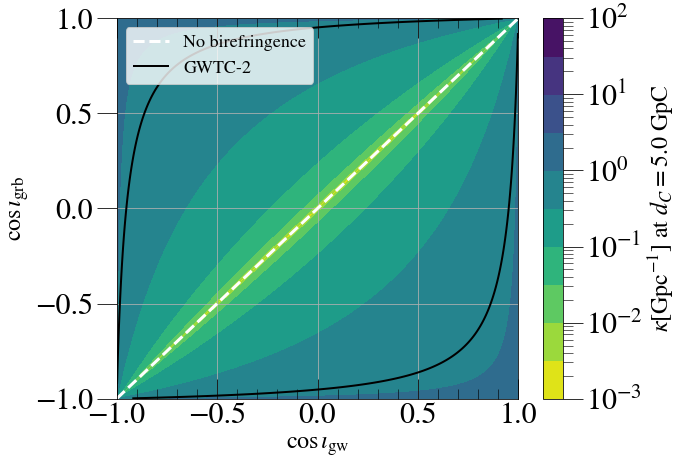

In [4]:
d_c = 5.0
plot_kappa_contour(d_c)


In [93]:
def plot_kappa_contour_tight(d_c, plot_dcs = False, iota_gw_tight = False):
    
    """ plot a contour plot for kappa constraints given a comoving distance
        d_c: comoving distance in gpc
        
        plot_dcs: Instead of making the plot of kappa, make the plot
        of the dcs coupling parameter 
        
        iota_gw_tight: focus on a smaller region of iota_gw

        """
    cos_iota_tr_min = np.cos(np.deg2rad(5))
    cos_iota_tr_max = 1 
    
    #cos_iota_tr_min = -1 
    #cos_iota_tr_max = np.cos(np.deg2rad(180 - 5))
    
    cos_iota_gw_min = -1 if not iota_gw_tight else cos_iota_tr_min
    cos_iota_gw_max = 1 if not iota_gw_tight else cos_iota_tr_max

    cos_iota_gw = np.linspace(cos_iota_gw_min, cos_iota_gw_max, 100)
    cos_iota_tr = np.linspace(cos_iota_tr_min,  cos_iota_tr_max, 100)
    iota_tr_deg = np.rad2deg(np.arccos(cos_iota_tr))
    
    X, Y  = np.meshgrid(cos_iota_gw, cos_iota_tr)
    Z = kappa_from_cos(X, Y, d_c = d_c)
        
    if plot_dcs:
        ## If plotting the dCS quantity, compute ell [km] using Eq. 36 in Okounkova+21 
        Z = Z * 1400

    plt.figure(figsize = (9,7))

    contours = plt.contourf(X, Y, Z, cmap = 'viridis_r')    
    cbar = plt.colorbar()
    
    if plot_dcs:
        cbar.set_label(r'$\ell_0 [\mathrm{km}]$ at $d_C = %.1f$ GpC' % d_c)
    else:
        cbar.set_label(r'$\kappa [\mathrm{Gpc}^{-1}]$ at $d_C = %.1f$ GpC' % d_c)

    plt.plot([cos_iota_tr_min, cos_iota_tr_max], [cos_iota_tr_min, cos_iota_tr_max], \
             '--', color = 'white', label = 'No birefringence')
    plt.xlabel(r'$\cos \,\iota_\mathrm{gw}$')
    plt.ylabel(r'$\cos \,\iota_\mathrm{grb}$')

    plt.grid()
    plt.show()

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


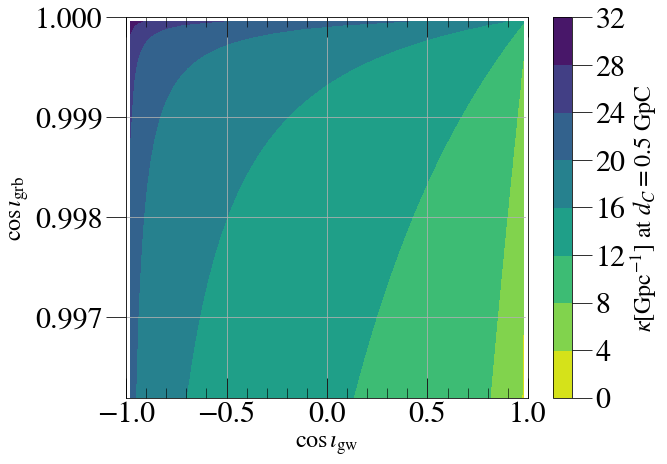

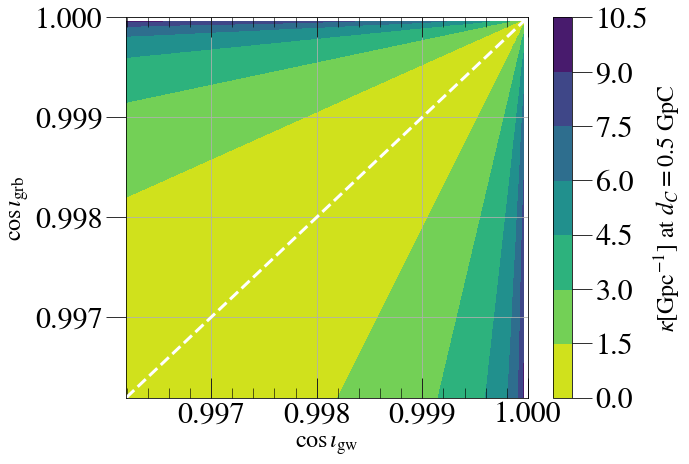

In [141]:
plot_kappa_contour_tight(0.5)
plot_kappa_contour_tight(0.5, iota_gw_tight = True)

In [17]:
def plot_kappa_with_distance():

    cos_iota_gw = np.linspace(-1, 1, 10000)
    iota_gw_deg = np.rad2deg(np.arccos(cos_iota_gw))
    iota_grb_bound = 5
    cos_iota_grb_min = np.cos(np.deg2rad(iota_grb_bound))

    plt.figure(figsize = (10, 6))

    d_c_arr = np.linspace(0.1, 5.0, 10)
    cs = sns.color_palette('mako', n_colors=len(d_c_arr))

    for i, d_c in enumerate(d_c_arr):

        kappa = kappa_from_cos(cos_iota_gw, cos_iota_grb_min, d_c = d_c)
        plt.plot(iota_gw_deg, kappa, label = '$%.1f$' % d_c if (i % 4 == 0) else None, color = cs[i])

    plt.axvline(iota_grb_bound, color = 'red', ls = '--', label = '$\iota_\mathrm{gw} = \iota_\mathrm{grb}$')
    plt.tight_layout()
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(1e-1, 1e3)
    plt.xlim(0, 180)
    plt.grid(alpha = 0.5)
    leg = plt.legend(frameon=True, title = '$d_C$ [GpC]', loc = 'upper left', \
                     ncol = 1, fontsize = '16', framealpha = 1.0)
    plt.setp(leg.get_title(),fontsize='16')
    plt.xlabel('$\iota_\mathrm{gw}$ [deg]')
    plt.ylabel(r'$\kappa [\mathrm{Gpc}^{-1}]$')
    plt.show()

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/U

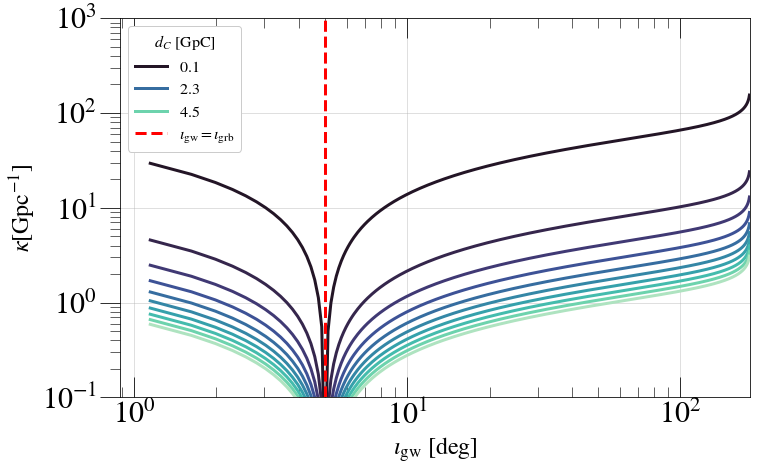

In [18]:
plot_kappa_with_distance()

### Inclination angle considerations

Here, we consider the detectability of GW inclinations in LIGO-Virgo and 3G detectors, computing $p(\iota)$. 
The distribution for LIGO-Virgo is given by Schutz in Eq. 28 of https://arxiv.org/abs/1102.5421, 
while surprisingly, as shown by vitale in https://arxiv.org/abs/1610.06914#, $p(\iota) \sim \sin(\iota)$ for 3G detectors. 

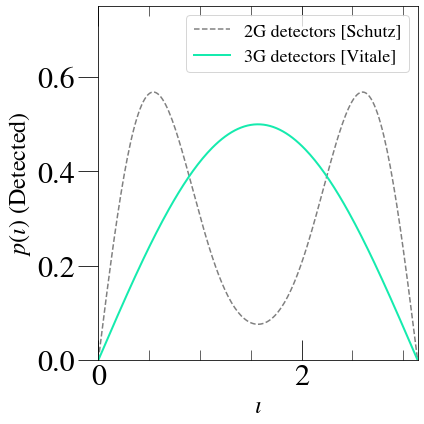

In [14]:
def SchutzDistribution(iota):
    """ Equation 28 of Schutz 2011"""
    return 0.076076*(1 + 6*np.cos(iota)**2 + np.cos(iota)**4)**(3/2) * np.sin(iota)

def VitaleDistribution(iota):
    """ See Fig. 5 of Vitale 2016, with 1/2 as normalizing factor"""
    return 0.5 * np.sin(iota)

iotas = np.linspace(0, pi, 200)
schutz = SchutzDistribution(iotas)
vitale = VitaleDistribution(iotas)

plt.figure(figsize = (6,6))
plt.plot(iotas, schutz, label = '2G detectors [Schutz]', color = 'grey', lw = 1.5, ls = '--')
plt.plot(iotas, vitale, label = '3G detectors [Vitale]', color = '#15ebae', lw = 2.0)
plt.xlabel('$\iota$', fontsize = 24)
plt.ylim(0, 0.75)
plt.xlim(0, pi)
plt.legend(loc = 'upper right')
plt.ylabel('$p(\iota)$ (Detected)', fontsize = 24)
plt.tight_layout()
plt.show()


### Simulated GW + grb analysis
Let's now say that we know the uncertainty in the inclination angle for various events. This depends primarily on the distance (see for example https://arxiv.org/abs/0904.1017), as $d_L$ and $\iota$ are highly degenerate, at least for LIGO-Virgo. 

Let's also say that we detect a coincident grb, which we know is either face-on or face-off within 5 degrees ($\pi/36$ radians). Let's say that we can't tell whether it's face on or face of, but simple that $\iota \sim 0$ or $\iota \sim \pi$

In [57]:
def kappa_constraint(iota, dL):
    """
    Compute constraint on kappa and error bars given dL and iota
    assuming that we have a co-incident grb 
    
    iota : inclination angle in radians measured from gws
    dL : luminosity distance in Gpc
    
    Note that as the distance increases, the *measurement*
    of kappa will decrease, as kappa * d_c must be a 
    constant
    
    """
    cos_iota_gw = np.cos(iota)
    sigma_dL, sigma_iota = UncertaintyInterval_dL_iota(dL, iota)
    
    ## True value for coincident grb
    ## We don't know if it's face on or face-off, so we'll compute
    ## kappa for both and take the minimum
    
    ## Add uncertainties on this [TODO]
    cos_iota_tr_on = np.cos(pi/36)
    cos_iota_tr_off = np.cos(pi - pi/36)
    
    ## Convert from luminosity distance to comoving distance [TODO]
    kappa_on = kappa_from_cos(cos_iota_gw, cos_iota_tr_on , d_c = dL)
    kappa_off = kappa_from_cos(cos_iota_gw, cos_iota_tr_off , d_c = dL)
    kappa = np.minimum(kappa_on, kappa_off)
    return kappa

In [58]:
def uncertaintyInterval_dL_iota(iota, dL):
    """ 
    Return the uncertainties on the luminosity distance and the inclination angle
    for typical 3G detector GW analysis
    
    iota : inclination angle in radians
    dL : luminosity distance in Gpc
    
    
    returns sigma(dL), sigma(iota)
    """
    ## Fake values for now since we don't know them - ideally this will be a function
    ## of d_L and iota we get from the literature [TODO]
    return 0.1, 0.1

/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/mokounkova/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


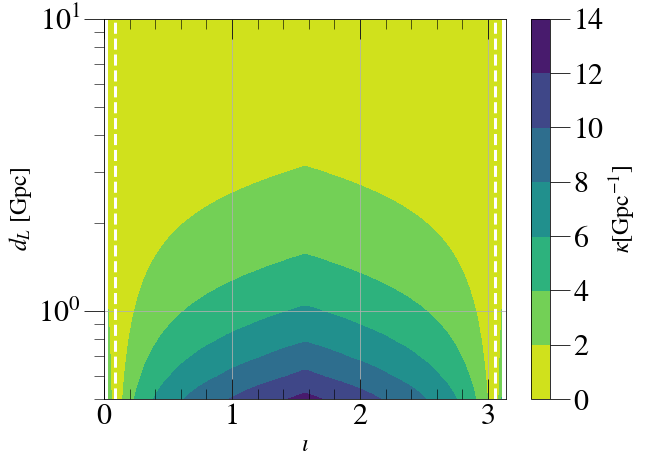

In [59]:
iotas = np.linspace(0, pi, 100)
dLs = np.linspace(0.5, 10, 100)
X, Y  = np.meshgrid(iotas, dLs)
Z = kappa_constraint(X, Y)

plt.figure(figsize = (9,7))

contours = plt.contourf(X, Y, Z, cmap = 'viridis_r')    
cbar = plt.colorbar()

cbar.set_label(r'$\kappa [\mathrm{Gpc}^{-1}]$')

plt.axvline(pi/36, color = 'white', ls = '--')
plt.axvline(pi - pi/36, color = 'white', ls = '--')

plt.yscale('log')
plt.xlabel(r'$\iota$')
plt.ylabel(r'$d_L$ [Gpc]')

plt.grid()
plt.show()